#L3
**L3 Distributions of body height and income**

height-income-distributions  dataset

In [3]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from scipy.stats import norm

warnings.filterwarnings("ignore")


In [4]:
# Import the prewritten helper functions
from py_helper_functions import *

##### load in clean and tidy data and create workfile

In [5]:
hrs = pd.read_csv("hrs_height_income.csv")


In [6]:
hrs["height"] = hrs["height"].apply(pd.to_numeric, errors="coerce")


In [7]:
filtered_women = hrs.loc[
    (hrs["age"] >= 55)
    & (hrs["age"] < 60)
    & (hrs["female"] == 1)
    & (hrs["height"] > 1.3)
    & (hrs["height"] < 2.1)
]

In [8]:
hrs.height.describe()


count    18660.000000
mean         1.677539
std          0.104078
min          1.003300
25%          1.600200
50%          1.676400
75%          1.752600
max          2.324100
Name: height, dtype: float64

In [9]:
hrs.head()

,hhidpn,age,height,hhincome,female
0,3020,75,1.6256,703.50000,1
1,10001010,74,1.8034,12.00000,0
2,10003030,58,1.5494,11.88012,1
3,10004040,68,1.6510,19.20000,1
4,10013010,76,1.7272,15.27600,0


##### graph --height

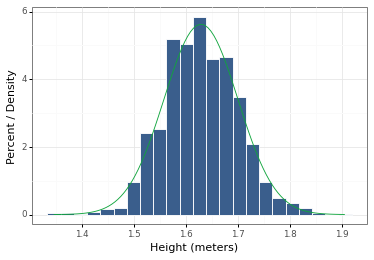

<ggplot: (8773882096509)>

In [10]:
from numpy import arange as seq


(
    ggplot(filtered_women, aes(x="height"))
    + geom_histogram(
        aes(y="stat(density)"),
        bins=23,
        fill=color[0],
        color="white",
        alpha=0.8,
        center=1.55,
        closed="right",
    )
    + stat_function(
        fun=norm.pdf,
        colour=color[1],
        args=[np.mean(filtered_women["height"]), np.std(filtered_women["height"])],
    )
    + theme_bw()
    + ylab("Percent / Density")
    + xlab("Height (meters)")
)


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy
sns.set_style("whitegrid")

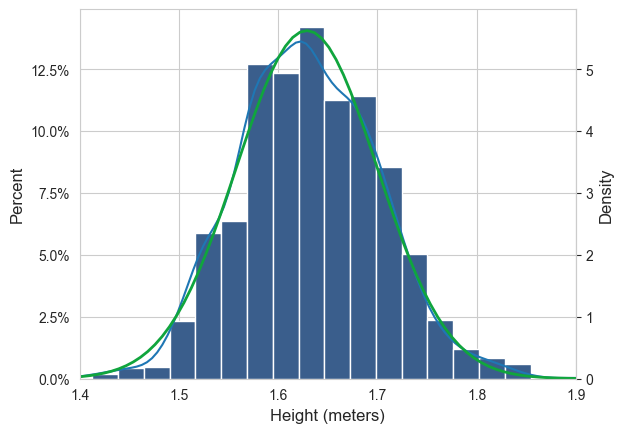

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy
sns.set_style("whitegrid")

fig, ax1 = plt.subplots()

# histogram
sns.distplot(
    filtered_women["height"],
    bins=np.arange(1.4125, 1.875, 0.026).round(decimals=4),
    hist_kws={"edgecolor": "white", "color": color[0], "alpha": 1},
    ax=ax1,
)

# calculate the norm. pdf
x0, x1 = ax1.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(
    x_pdf,
    loc=np.mean(filtered_women["height"]),
    scale=np.std(filtered_women["height"]),
)
ax1.plot(x_pdf, y_pdf, color[1], lw=2)

# add second axis
secax = ax1.secondary_yaxis("right")
secax.set_ylabel("Density", size=12)

# formatting
plt.ylabel("Percent", size=12)
plt.xlabel("Height (meters)", size=12)
plt.yticks(np.arange(0, 6, 1))
ax1.set_yticklabels([f"{i}%" for i in np.arange(0, 15, 2.5)])
plt.xlim(1.4, 1.9)
plt.show()


##### LOGNORMAL: family income of women age 55-59 

#### income variable

In [13]:
# filter dataset
filtered_women_income = hrs.loc[
    (hrs["age"] >= 55)
    & (hrs["age"] < 60)
    & (hrs["female"] == 1)
    & (hrs["hhincome"] > 1)
    & (hrs["hhincome"] < 1000)
]

In [14]:
filtered_women_income["hhincome"].describe()


count    1918.000000
mean       74.931920
std        87.185212
min         1.200000
25%        19.704000
50%        48.000000
75%       100.800000
max       945.000000
Name: hhincome, dtype: float64

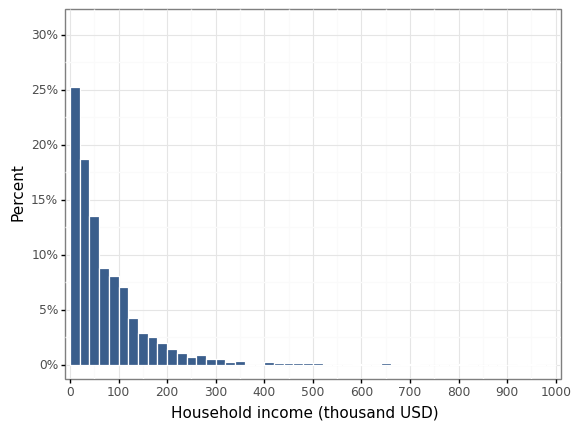

<ggplot: (8773884721705)>

In [15]:
(
    ggplot(filtered_women_income, aes(x="hhincome"))
    + geom_histogram(
        aes(y="stat(count)/sum(stat(count))"),
        binwidth=20,
        boundary=0,
        fill=color[0],
        color="white",
        alpha=0.8,
        closed="left",
    )
    + ylab("Percent")
    + xlab("Household income (thousand USD)")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 1001), breaks=np.arange(0, 1001, step=100)
    )
    + scale_y_continuous(
        expand=(0.01, 0.01),
        limits=(0, 0.31),
        breaks=np.arange(0, 0.31, step=0.05),
        labels=percent_format(),
    )
    + theme_bw()
)


In [16]:
# ln income
filtered_women_income["lnincome"] = np.log(filtered_women_income["hhincome"])


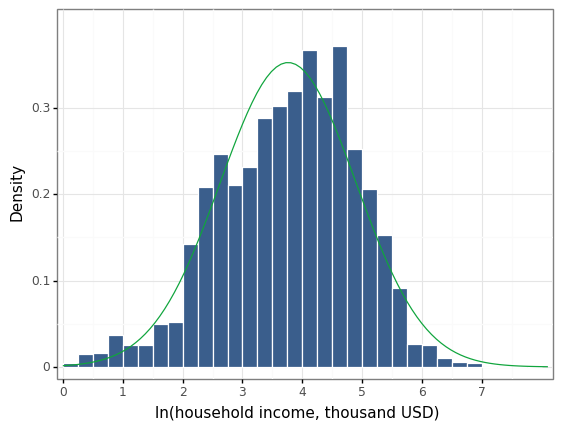

<ggplot: (8773864776709)>

In [17]:
(
    ggplot(filtered_women_income, aes(x="lnincome"))
    + geom_histogram(
        aes(y="stat(density)"),
        binwidth=0.25,
        fill=color[0],
        color="white",
        boundary=4,
        closed="right",
    )
    + stat_function(
        fun=norm.pdf,
        colour=color[1],
        args=[
            np.mean(filtered_women_income["lnincome"]),
            np.std(filtered_women_income["lnincome"]),
        ],
    )
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 8.1), breaks=seq(0, 8, step=1))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 0.4), breaks=seq(0, 0.4, step=0.1)
    )
    + ylab("Density")
    + xlab("ln(household income, thousand USD)")
    + theme_bw()
)


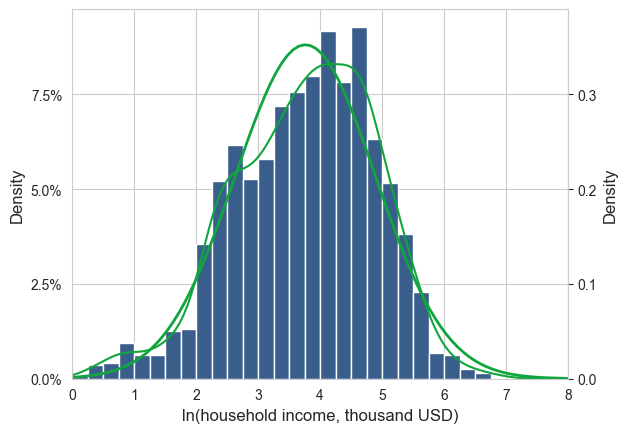

In [18]:
fig, ax1 = plt.subplots()

# histogram
sns.distplot(
    filtered_women_income["lnincome"],
    hist=True,
    kde=True,
    bins=seq(0, 7, 0.25),
    hist_kws={"edgecolor": "white", "color": color[0], "alpha": 1},
    kde_kws={"color": color[1]},
    ax=ax1,
)

# calculate the norm. pdf
x0, x1 = ax1.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(
    x_pdf,
    loc=np.mean(filtered_women_income["lnincome"]),
    scale=np.std(filtered_women_income["lnincome"]),
)
ax1.plot(x_pdf, y_pdf, color[1], lw=2)

# add second axis
secax = ax1.secondary_yaxis("right")
secax.set_ylabel("Density", size=12)
secax.set_yticks(seq(0, 0.4, 0.1))

# formating
plt.ylabel("Density", size=12)
plt.xlabel("ln(household income, thousand USD)", size=12)
plt.yticks(seq(0, 0.4, 0.1))
ax1.set_yticklabels([f"{i}%" for i in seq(0, 10, 2.5)])
plt.xlim(0, 8)
plt.show()
